In [1]:
# Exploratory Data Analysis (EDA) is the process of examining and summarizing a dataset to uncover patterns, trends, relationships,
# and anomalies. It involves using statistical summaries (e.g., mean, median), visualizations (e.g., histograms, scatter plots), 
# and data cleaning techniques to understand the data’s structure, assess its quality, and generate hypotheses for further analysis.
# EDA is a critical first step in data science workflows, often leveraging tools like Python (Pandas, Matplotlib, Seaborn) 
# or R within platforms like Jupyter Notebook to iteratively explore and communicate insights.

## Problem statement for Housing Data EDA

In [2]:
# Objective: Perform an exploratory data analysis (EDA) on a housing dataset to uncover insights into factors influencing property prices, identify patterns or anomalies, and prepare the data for predictive modeling (e.g., price prediction).

# Key Questions to Address:

# Data Understanding:

# What variables (e.g., square footage, location, bedrooms, year built) are most strongly correlated with housing prices?

# How are numerical and categorical features distributed?

# Data Quality:

# Are there missing values, duplicates, or outliers in the dataset?

# How should anomalies (e.g., unusually high/low prices) be handled?

# Trends and Relationships:

# How do property prices vary by location (e.g., zip code, neighborhood)?

# Is there a relationship between house age, renovation status, and price?

# Do amenities (e.g., pools, garages) impact prices significantly?

# Market Insights:

# What are the average prices for different property types (e.g., single-family homes, condos)?

# Are there seasonal trends in housing sales or prices?

# Expected Outcomes:

# Cleaned and preprocessed dataset ready for modeling.

# Visualizations (e.g., heatmaps, box plots, scatter plots) highlighting key relationships.

# Insights into drivers of housing prices and actionable recommendations (e.g., features to prioritize for valuation models).

# Tools: Python (Pandas, Matplotlib, Seaborn), Jupyter Notebook for iterative analysis and documentation.

# Example Workflow:

# Load and inspect the dataset (summary statistics, data types).

# Handle missing values and outliers.

# Analyze distributions (e.g., price, square footage).

# Explore correlations (e.g., price vs. bedrooms, location).

# Visualize spatial trends (e.g., price heatmaps by region).

# Summarize findings and propose next steps (e.g., feature engineering for regression models).

# This framework guides the EDA process while aligning with real-world housing market analysis goals.


## Importing all important libraries for this project

In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,Ridge,ElasticNet,Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import StandardScaler

import re
from sklearn.linear_model import LinearRegression

# imported data through pandas 

In [4]:
df=pd.read_excel(r"C:\Users\Priya Tripathi\Downloads\housing_data.xlsx")
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,None,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [5]:
df.shape

(1460, 81)

In [6]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

# lets figure out the shape of the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.describe()
#This function is describe the int and float colomn in the data like it have count, mean , standard deviton, min & max value percentile etc

,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.750000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1094.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [9]:
df.dtypes[df.dtypes!="object"]

Unnamed: 0         int64
LotFrontage        int64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea         int64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
YrSold             int64
SalePrice          int64
dtype: object

## i am making scatter plot in whole data one by one to find out the outlier which is majorly empacting the data for create LMS model 
## for predicting the sales price of the house.  

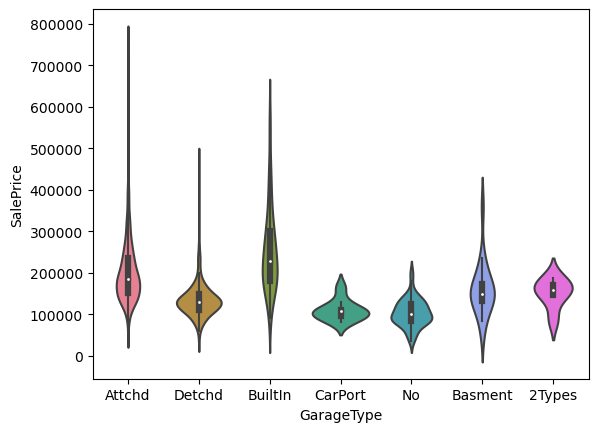

In [10]:
sn.violinplot(x="GarageType", y="SalePrice", data=df, palette="husl", inner="box")
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Your code goes here


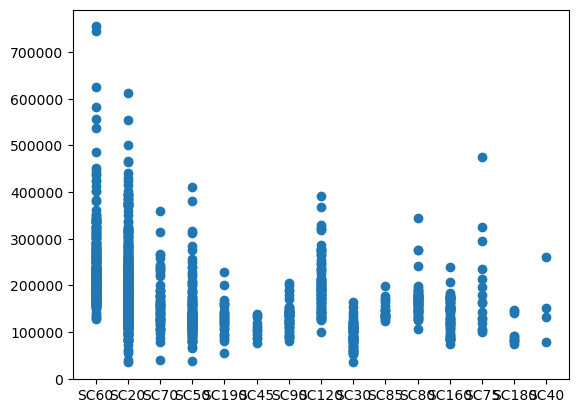

In [11]:
plt.scatter(x="MSSubClass", y="SalePrice",data=df  )

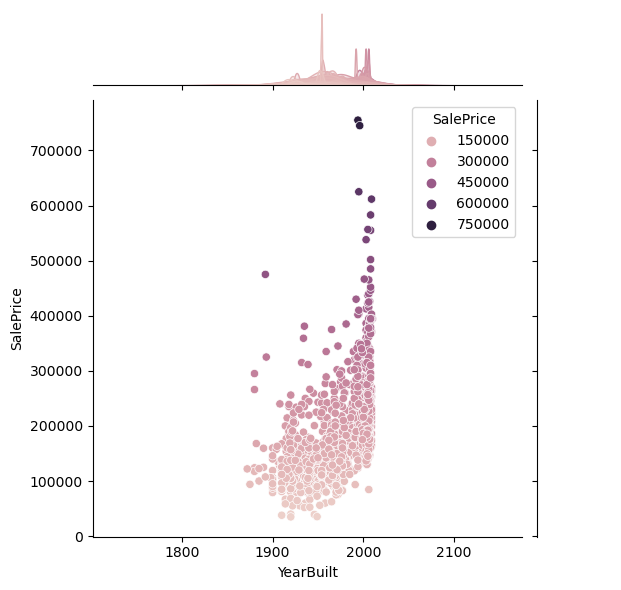

In [12]:
sn.jointplot(data=df, x="YearBuilt", y="SalePrice", hue="SalePrice")

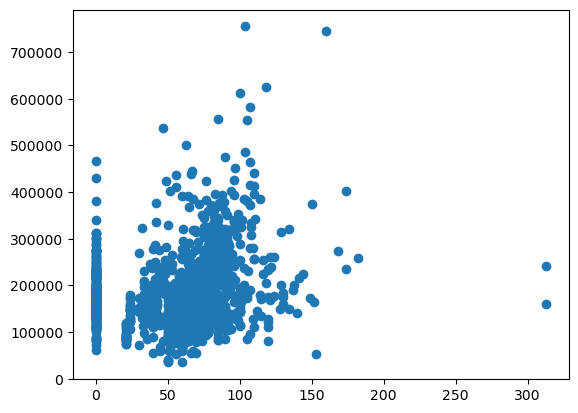

In [13]:
plt.scatter(x="LotFrontage", y="SalePrice",data=df  )

In [14]:
df.query("LotFrontage>300")
# drop 934,1298

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,934,SC20,RL,313,27650,Pave,None,IR2,HLS,AllPub,...,0,No,No,No,0,Nov,2008,WD,Normal,242000
1298,1298,SC60,RL,313,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,No,No,0,Jan,2008,New,Partial,160000


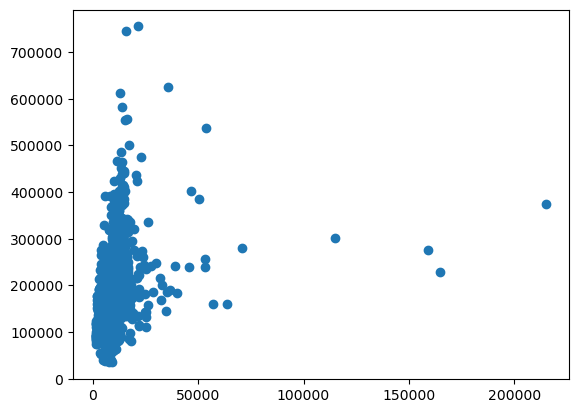

In [15]:
plt.scatter(x="LotArea", y="SalePrice",data=df  )

In [16]:
df.query("LotArea>55000")
# drop 294,313,335,451,706,1298,
#(1396) may be 

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,249,SC50,RL,0,159000,Pave,None,IR2,Low,AllPub,...,0,No,No,Shed,500,Jun,2007,WD,Normal,277000
313,313,SC20,RL,150,215245,Pave,None,IR3,Low,AllPub,...,0,No,No,No,0,Jun,2009,WD,Normal,375000
335,335,SC190,RL,0,164660,Grvl,None,IR1,HLS,AllPub,...,0,No,No,Shed,700,Aug,2008,WD,Normal,228950
451,451,SC20,RL,62,70761,Pave,None,IR1,Low,AllPub,...,0,No,No,No,0,Dec,2006,WD,Normal,280000
706,706,SC20,RL,0,115149,Pave,None,IR2,Low,AllPub,...,0,No,No,No,0,Jun,2007,WD,Normal,302000
1298,1298,SC60,RL,313,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,No,No,0,Jan,2008,New,Partial,160000
1396,1396,SC20,RL,0,57200,Pave,None,IR1,Bnk,AllPub,...,0,No,No,No,0,Jun,2010,WD,Normal,160000


In [17]:
stats.zscore(df["LotArea"]).sort_values().tail(10)
# 313,335,249,

384      4.268474
457      4.280500
769      4.308262
1396     4.678682
1298     5.348867
451      6.037793
706     10.486449
249     14.881285
335     15.448542
313     20.518273
Name: LotArea, dtype: float64

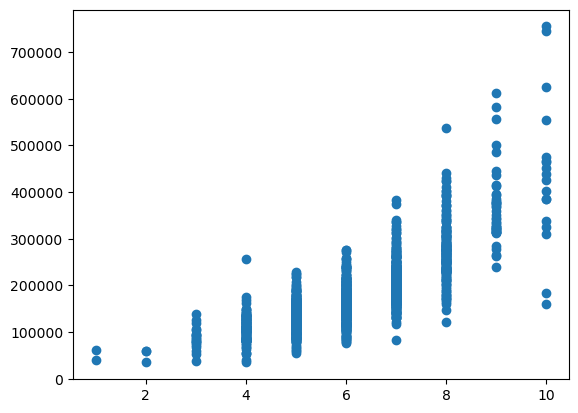

In [18]:
plt.scatter(x="OverallQual",  y="SalePrice",data=df)

In [19]:
df.query("OverallQual==10" )
# here overallqual means over all quality of house/building/apartment 
# may be 523


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,58,SC60,RL,66,13682,Pave,None,IR2,HLS,AllPub,...,0,No,No,No,0,Oct,2006,New,Partial,438780
185,185,SC75,RM,90,22950,Pave,None,IR2,Lvl,AllPub,...,0,No,GdPrv,No,0,Jun,2006,WD,Normal,475000
224,224,SC20,RL,103,13472,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2009,WD,Normal,386250
389,389,SC60,RL,96,12474,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2008,New,Partial,426000
440,440,SC20,RL,105,15431,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2009,WD,Normal,555000
515,515,SC20,RL,94,12220,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Sep,2009,New,Partial,402861
523,523,SC60,RL,130,40094,Pave,None,IR1,Bnk,AllPub,...,0,No,No,No,0,Oct,2007,New,Partial,184750
583,583,SC75,RM,75,13500,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jul,2008,WD,Normal,325000
591,591,SC60,RL,97,13478,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Jun,2009,ConLI,Normal,451950
691,691,SC60,RL,104,21535,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Jan,2007,WD,Normal,755000


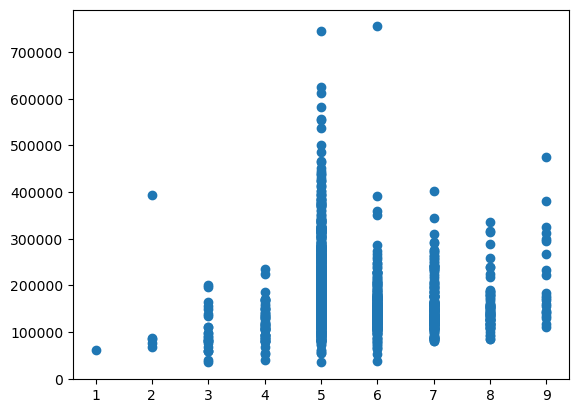

In [20]:
plt.scatter(x="OverallCond", y="SalePrice", data=df )

In [21]:
df.query("OverallCond==2" )
#378


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,88,SC50,C (all),105,8470,Pave,None,IR1,Lvl,AllPub,...,0,No,MnPrv,No,0,Oct,2009,ConLD,Abnorml,85000
250,250,SC30,RL,55,5350,Pave,None,IR1,Lvl,AllPub,...,0,No,GdWo,Shed,450,May,2010,WD,Normal,76500
378,378,SC20,RL,88,11394,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2010,New,Partial,394432
398,398,SC30,RM,60,8967,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Nov,2007,WD,Abnorml,67000
676,676,SC70,RM,60,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2006,WD,Normal,87000


In [22]:
df.query("OverallCond==5 &  SalePrice>70000")
#1183

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
2,2,SC60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
5,5,SC50,RL,85,14115,Pave,None,IR1,Lvl,AllPub,...,0,No,MnPrv,Shed,700,Oct,2009,WD,Normal,143000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,1451,SC20,RL,78,9262,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2009,New,Partial,287090
1452,1452,SC180,RM,35,3675,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2006,WD,Normal,145000
1453,1453,SC20,RL,90,17217,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jul,2006,WD,Abnorml,84500
1454,1454,SC20,FV,62,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,No,No,No,0,Oct,2009,WD,Normal,185000


In [23]:
df.isnull().sum().sum()

82

In [24]:
df.query("OverallCond==6 & SalePrice>70000")
#692

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,7,SC60,RL,0,10382,Pave,None,IR1,Lvl,AllPub,...,0,No,No,Shed,350,Nov,2009,WD,Normal,200000
9,9,SC190,RL,50,7420,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jan,2008,WD,Normal,118000
12,12,SC20,RL,0,12968,Pave,None,IR2,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,144000
19,19,SC20,RL,70,7560,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,May,2009,COD,Abnorml,139000
28,28,SC20,RL,47,16321,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2006,WD,Normal,207500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,1439,SC60,RL,80,11584,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Nov,2007,WD,Normal,197000
1443,1443,SC30,RL,0,8854,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2009,WD,Normal,121000
1456,1456,SC20,RL,85,13175,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1458,1458,SC20,RL,68,9717,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


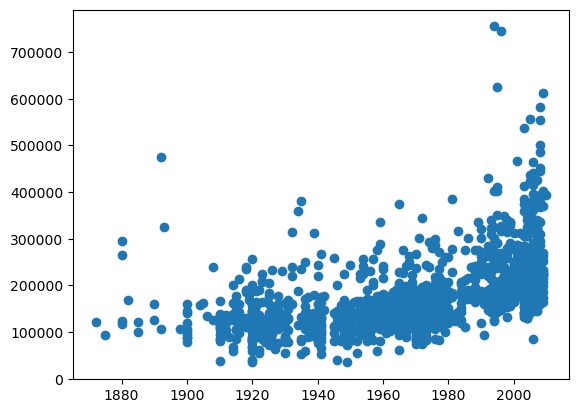

In [25]:
plt.scatter(x="YearBuilt", y="SalePrice", data=df )

In [26]:
df.query("YearBuilt<1900 & SalePrice>40000")
#185

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
106,106,SC30,RM,60,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,No,No,Shed,450,Aug,2007,WD,Normal,100000
185,185,SC75,RM,90,22950,Pave,None,IR2,Lvl,AllPub,...,0,No,GdPrv,No,0,Jun,2006,WD,Normal,475000
304,304,SC75,RM,87,18386,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2008,WD,Normal,295000
583,583,SC75,RM,75,13500,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jul,2008,WD,Normal,325000
630,630,SC70,RM,50,9000,Pave,Grvl,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Jun,2006,WD,Abnorml,124000
716,716,SC70,RM,60,10800,Pave,Grvl,Reg,Bnk,AllPub,...,0,No,No,No,0,Jul,2007,WD,Normal,159500
747,747,SC70,RM,65,11700,Pave,Pave,IR1,Lvl,AllPub,...,0,No,No,No,0,May,2009,WD,Normal,265979
809,809,SC75,RM,90,8100,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Nov,2009,WD,Normal,106000
945,945,SC50,RM,98,8820,Pave,None,Reg,Lvl,AllPub,...,0,No,MnWw,No,0,Sep,2009,WD,Normal,124900
991,991,SC70,RM,121,17671,Pave,Grvl,Reg,Lvl,AllPub,...,0,No,No,No,0,Nov,2009,WD,Normal,168000


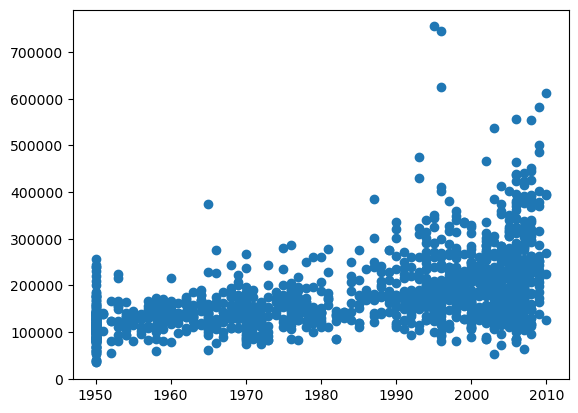

In [27]:
plt.scatter(x="YearRemodAdd", y="SalePrice", data=df )

In [28]:
df.query("YearRemodAdd<1970 & SalePrice>30000")
#313

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
8,8,SC50,RM,51,6120,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2008,WD,Abnorml,129900
9,9,SC190,RL,50,7420,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jan,2008,WD,Normal,118000
10,10,SC20,RL,70,11200,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,129500
12,12,SC20,RL,0,12968,Pave,None,IR2,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,144000
14,14,SC20,RL,0,10920,Pave,None,IR1,Lvl,AllPub,...,0,No,GdWo,No,0,May,2008,WD,Normal,157000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1427,SC50,RL,60,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,No,No,No,0,Apr,2008,WD,Normal,140000
1443,1443,SC30,RL,0,8854,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2009,WD,Normal,121000
1445,1445,SC85,RL,70,8400,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,129000
1446,1446,SC20,RL,0,26142,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,157900


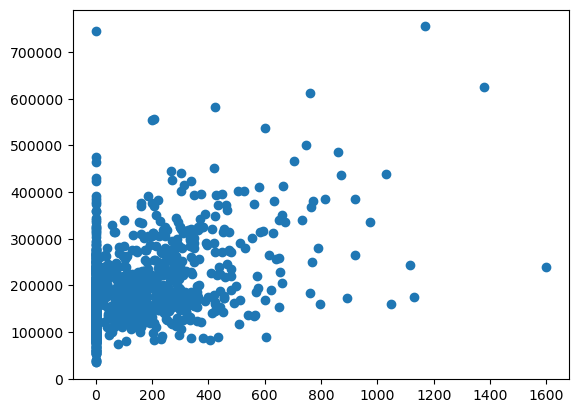

In [29]:
plt.scatter(x="MasVnrArea", y="SalePrice", data=df )

In [30]:
df.query("MasVnrArea>1500")
#297

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
297,297,SC60,FV,66,7399,Pave,Pave,IR1,Lvl,AllPub,...,0,No,No,No,0,Jun,2007,WD,Normal,239000


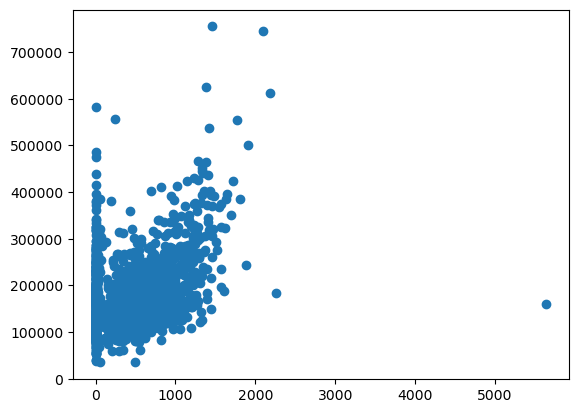

In [31]:
plt.scatter(x="BsmtFinSF1", y="SalePrice", data=df )

In [32]:
df.query("BsmtFinSF1 >5000")
#1298


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1298,SC60,RL,313,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,No,No,0,Jan,2008,New,Partial,160000


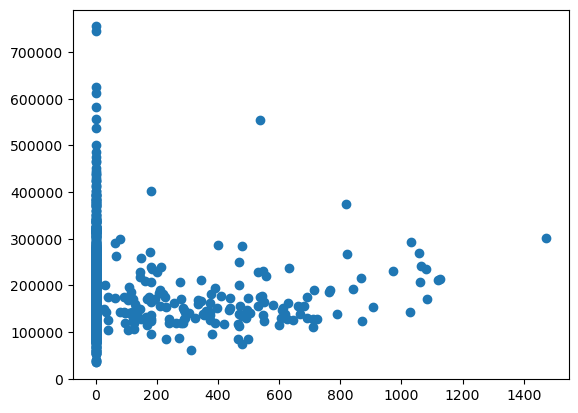

In [33]:
plt.scatter(x="BsmtFinSF2", y="SalePrice", data=df )

In [34]:
df.query("BsmtFinSF2 > 1400 & SalePrice>50000")

#440

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
322,322,SC60,RL,86,10380,Pave,None,IR1,Lvl,AllPub,...,0,No,MnPrv,No,0,Aug,2007,WD,Normal,301000


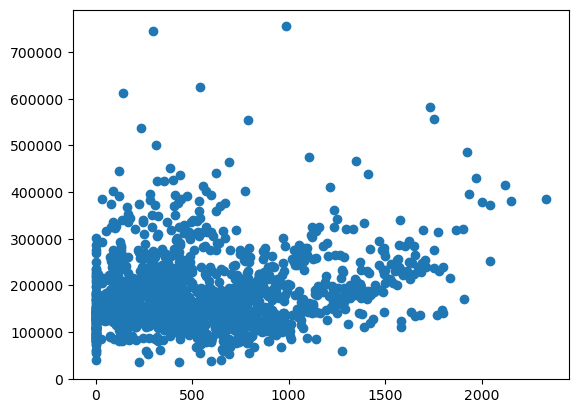

In [35]:
plt.scatter(x="BsmtUnfSF", y="SalePrice", data=df )

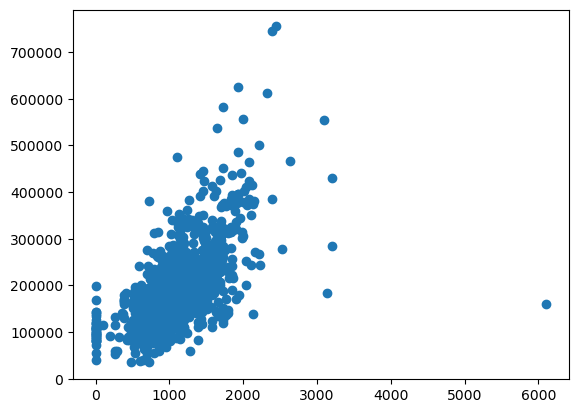

In [36]:
plt.scatter(x="TotalBsmtSF", y="SalePrice", data=df )

In [37]:
df.query("TotalBsmtSF>6000")
#1298


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1298,SC60,RL,313,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,No,No,0,Jan,2008,New,Partial,160000


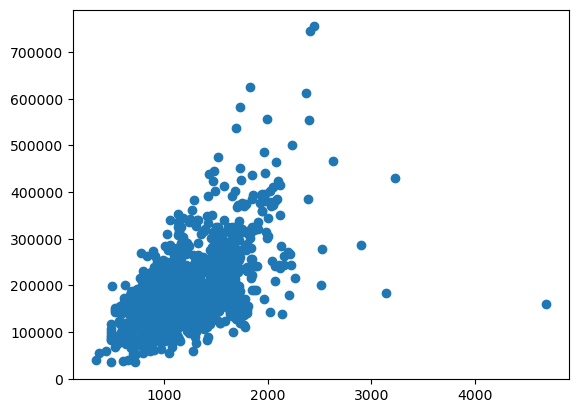

In [38]:
plt.scatter(x="1stFlrSF", y="SalePrice", data=df )

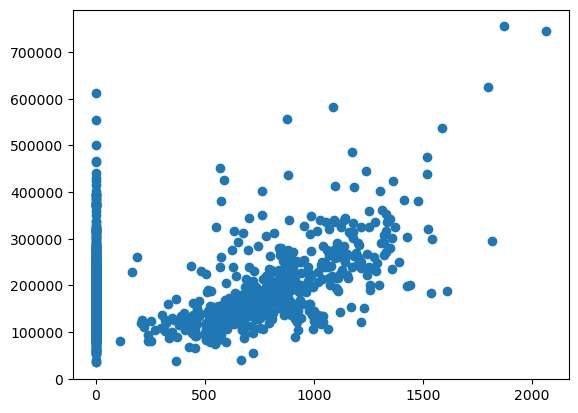

In [39]:
plt.scatter(x="2ndFlrSF", y="SalePrice", data=df )

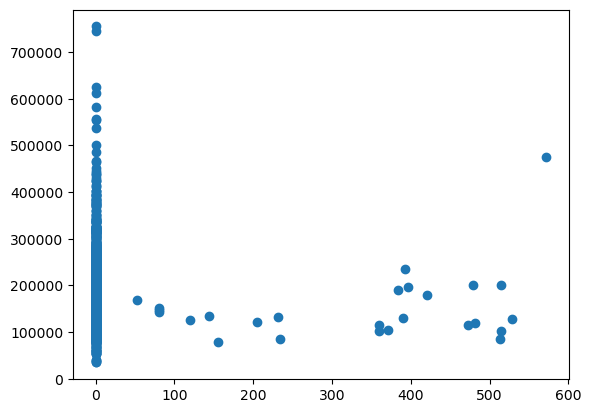

In [40]:
plt.scatter(x="LowQualFinSF", y="SalePrice", data=df )

In [41]:
df.query("LowQualFinSF>500 & SalePrice >40000")
# 185

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
88,88,SC50,C (all),105,8470,Pave,None,IR1,Lvl,AllPub,...,0,No,MnPrv,No,0,Oct,2009,ConLD,Abnorml,85000
170,170,SC50,RM,0,12358,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,128500
185,185,SC75,RM,90,22950,Pave,None,IR2,Lvl,AllPub,...,0,No,GdPrv,No,0,Jun,2006,WD,Normal,475000
635,635,SC190,RH,60,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,No,No,No,0,Mar,2007,WD,Abnorml,200000
1009,1009,SC50,RL,60,6000,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2006,WD,Normal,102000


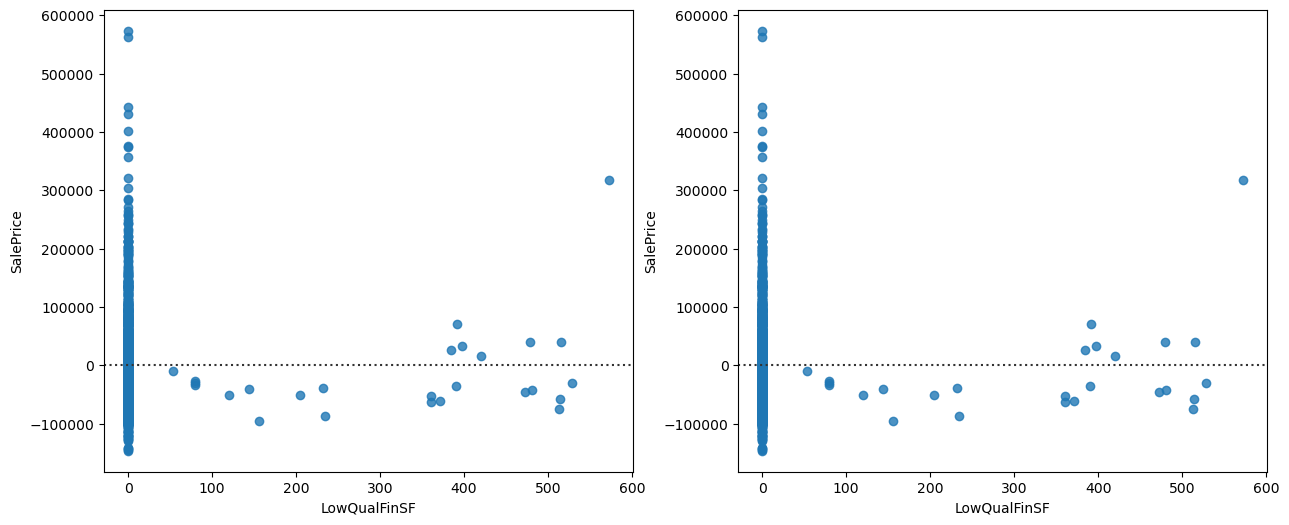

In [42]:
fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols=2, sharey=False, sharex=False)


sn.residplot(x="LowQualFinSF", y='SalePrice', data=df, ax=ax1)
sn.residplot(x="LowQualFinSF", y='SalePrice', data=df, ax=ax2)

plt.show()



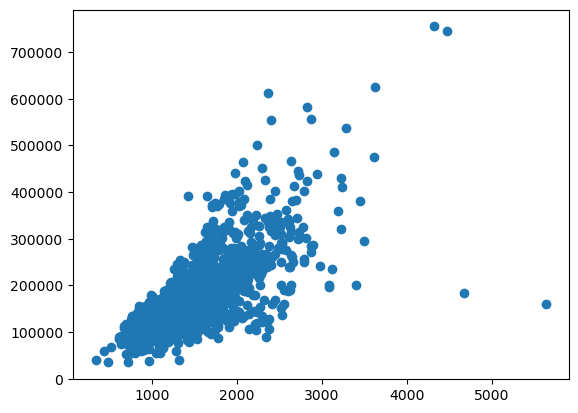

In [43]:
plt.scatter(x="GrLivArea", y="SalePrice", data=df )

In [44]:
df.query("GrLivArea>4400")
#523,1298


,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,523,SC60,RL,130,40094,Pave,None,IR1,Bnk,AllPub,...,0,No,No,No,0,Oct,2007,New,Partial,184750
1182,1182,SC60,RL,160,15623,Pave,None,IR1,Lvl,AllPub,...,555,Ex,MnPrv,No,0,Jul,2007,WD,Abnorml,745000
1298,1298,SC60,RL,313,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,No,No,0,Jan,2008,New,Partial,160000


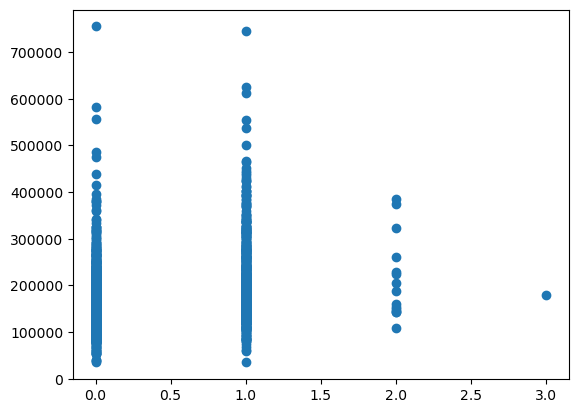

In [45]:
plt.scatter(x="BsmtFullBath", y="SalePrice", data=df )

In [46]:
df.query("BsmtFullBath ==3.0")
#738

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,738,SC90,RL,60,10800,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Mar,2009,WD,Alloca,179000


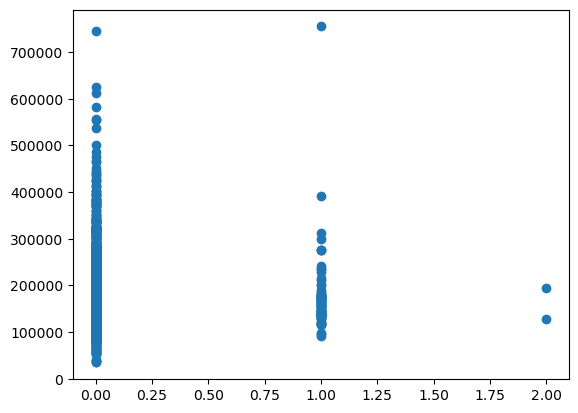

In [47]:
plt.scatter(x="BsmtHalfBath", y="SalePrice", data=df )

In [48]:
df.query("BsmtHalfBath ==2.0")
#597,954

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
597,597,SC120,RL,53,3922,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2007,New,Partial,194201
954,954,SC90,RL,35,9400,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Oct,2006,WD,AdjLand,127500


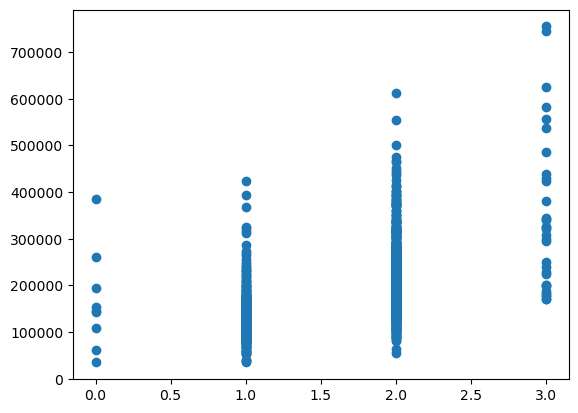

In [49]:
plt.scatter(x="FullBath", y="SalePrice", data=df )

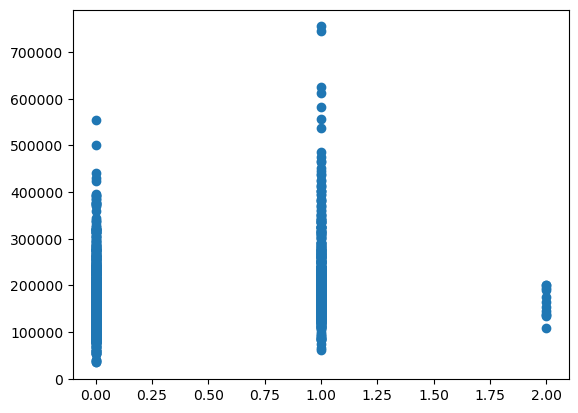

In [50]:
plt.scatter(x="HalfBath", y="SalePrice", data=df )

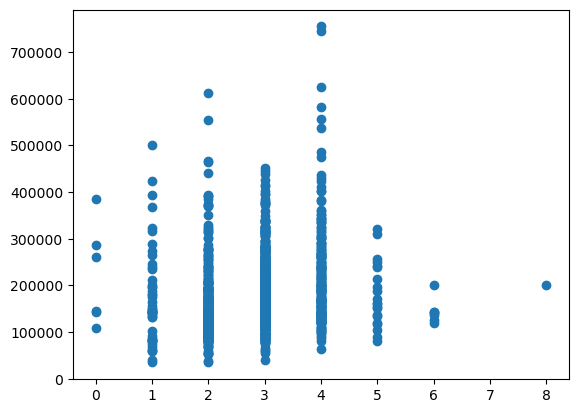

In [51]:
plt.scatter(x="BedroomAbvGr", y="SalePrice", data=df )

In [52]:
df.query("BedroomAbvGr  ==8.0")
#635

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,635,SC190,RH,60,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,No,No,No,0,Mar,2007,WD,Abnorml,200000


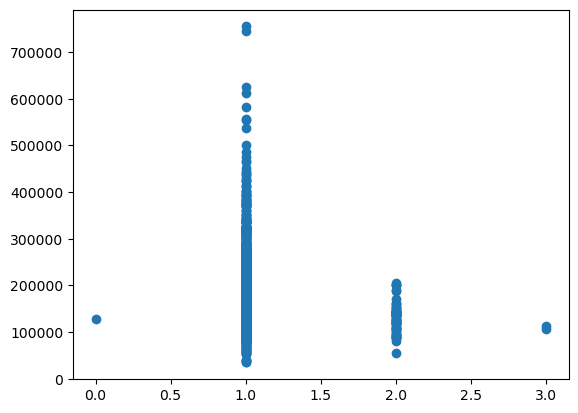

In [53]:
plt.scatter(x="KitchenAbvGr", y="SalePrice", data=df )

In [54]:
df.query("KitchenAbvGr   ==3.0")
#48,809

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
48,48,SC190,RM,33,4456,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2009,New,Partial,113000
809,809,SC75,RM,90,8100,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Nov,2009,WD,Normal,106000


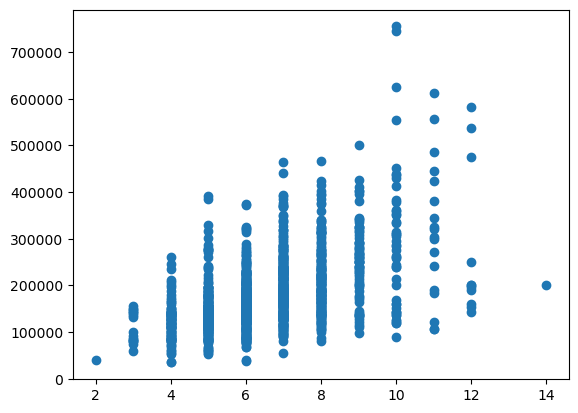

In [55]:
plt.scatter(x="TotRmsAbvGrd", y="SalePrice", data=df )

In [56]:
df.query("TotRmsAbvGrd ==14.0")
#635

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
635,635,SC190,RH,60,10896,Pave,Pave,Reg,Bnk,AllPub,...,0,No,No,No,0,Mar,2007,WD,Abnorml,200000


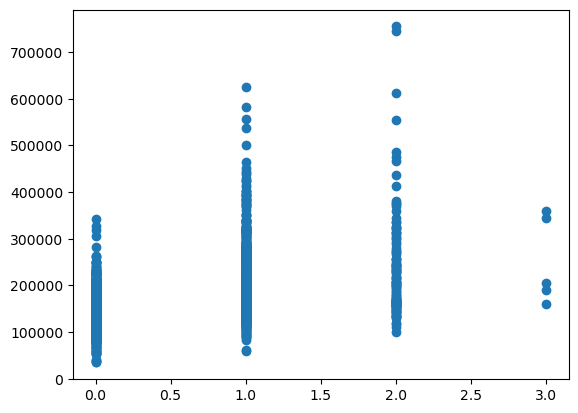

In [57]:
plt.scatter(x="Fireplaces", y="SalePrice", data=df )

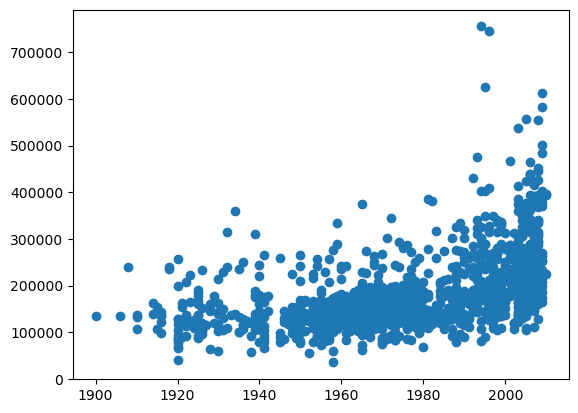

In [58]:
plt.scatter(x="GarageYrBlt", y="SalePrice", data=df)

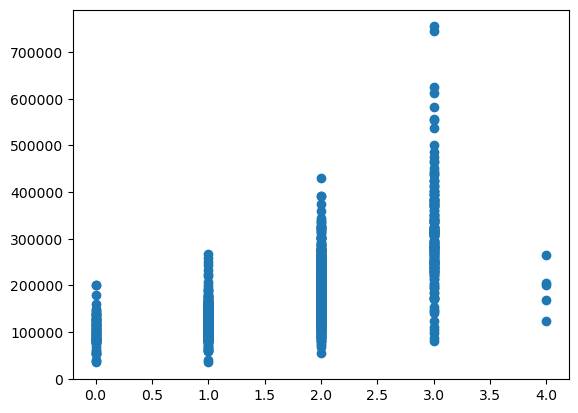

In [59]:
plt.scatter(x="GarageCars", y="SalePrice", data=df)

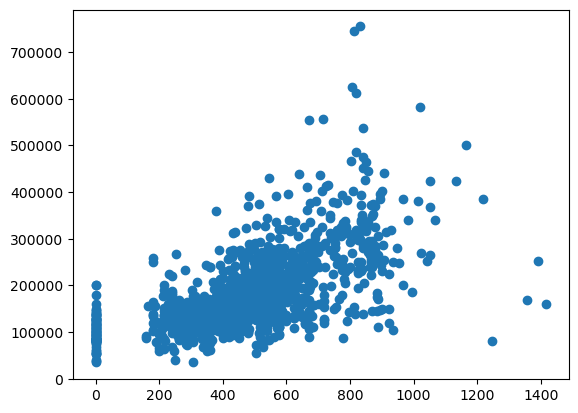

In [60]:
plt.scatter(x="GarageArea", y="SalePrice", data=df)

In [61]:
df.query("GarageArea>1200")
#1061,1190

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,581,SC20,RL,98,12704,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2009,New,Partial,253293
825,825,SC20,RL,114,14803,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Jun,2008,New,Partial,385000
1061,1061,SC30,C (all),120,18000,Grvl,None,Reg,Low,AllPub,...,0,No,No,Shed,560,Aug,2008,ConLD,Normal,81000
1190,1190,SC190,RL,0,32463,Pave,None,Reg,Low,AllPub,...,0,No,No,No,0,Mar,2007,WD,Normal,168000
1298,1298,SC60,RL,313,63887,Pave,None,IR3,Bnk,AllPub,...,480,Gd,No,No,0,Jan,2008,New,Partial,160000


In [62]:
df

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,None,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


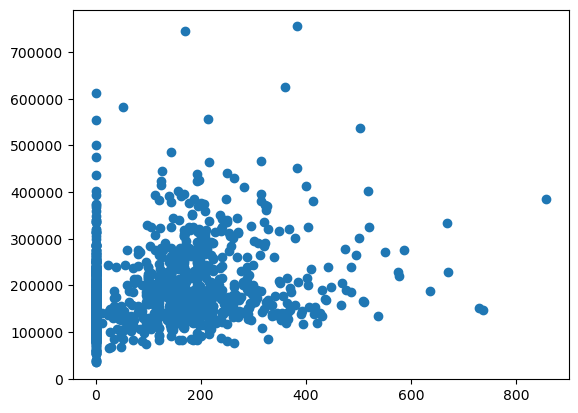

In [63]:
plt.scatter(x="WoodDeckSF", y= "SalePrice", data=df)

In [64]:
df.query("WoodDeckSF>800")
#53 may be

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
53,53,SC20,RL,68,50271,Pave,None,IR1,Low,AllPub,...,0,No,No,No,0,Nov,2006,WD,Normal,385000


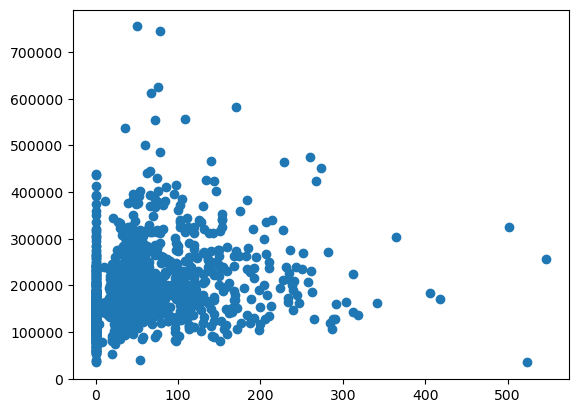

In [65]:
plt.scatter(x="OpenPorchSF", y="SalePrice", data=df)

In [66]:
df.query("OpenPorchSF>=500")
495

495

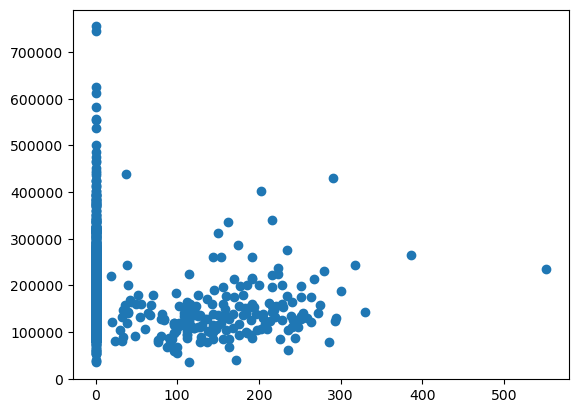

In [67]:
plt.scatter(x="EnclosedPorch", y="SalePrice", data=df )

In [68]:
df.query("EnclosedPorch  >500")
197

197

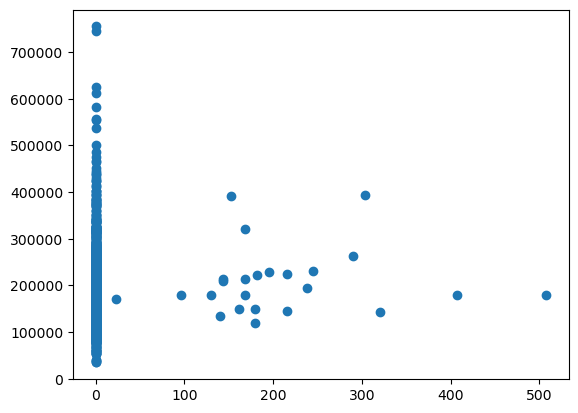

In [69]:
plt.scatter(x="3SsnPorch", y="SalePrice", data=df )

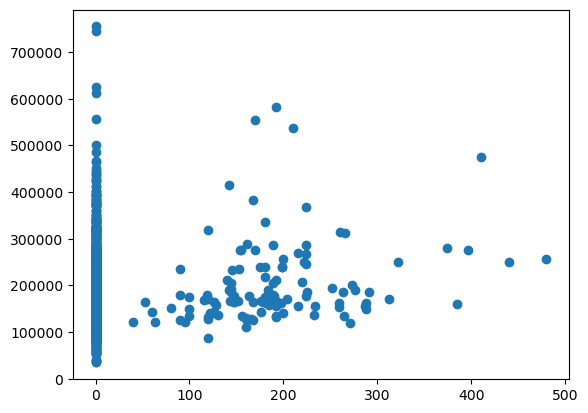

In [70]:
plt.scatter(x="ScreenPorch", y="SalePrice", data=df )

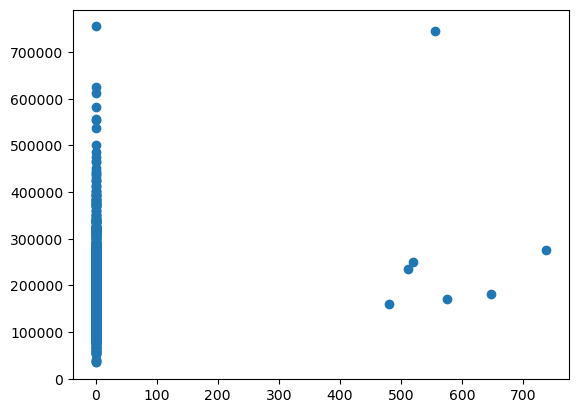

In [71]:
plt.scatter(x="PoolArea", y="SalePrice", data=df )

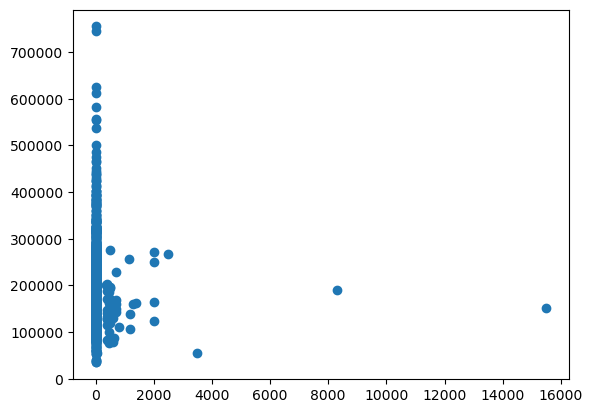

In [72]:
plt.scatter(x="MiscVal", y="SalePrice", data=df )

In [73]:
stats.zscore(df["MiscVal"]).sort_values()

0       -0.087688
976     -0.087688
975     -0.087688
974     -0.087688
973     -0.087688
          ...    
890      3.944952
1457     4.953112
705      6.969431
1230    16.647766
346     31.165268
Name: MiscVal, Length: 1460, dtype: float64

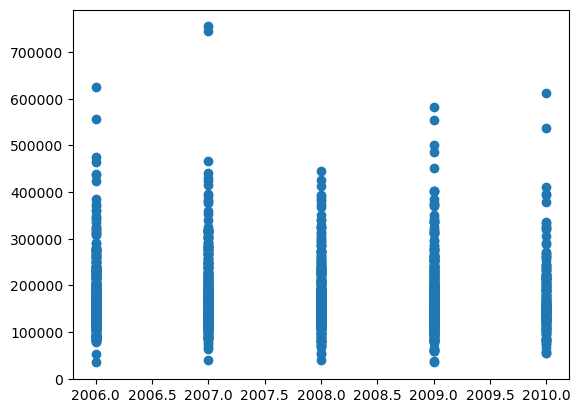

In [74]:
plt.scatter(x="YrSold", y="SalePrice", data=df )
#346

## now, deleting all the outlier

## Droping outliers from every column
### marked by  us using scatter plot

In [75]:
df.rename(columns={"Unnamed: 0":"HouseID"},inplace=True)
df

,HouseID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,None,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


In [76]:
values = [934,1298,294,313,335,451,706,249,523,378,1183,692,185,297,440,738,597,954,635,48,809,1061,1190,53,495,197,346]

In [77]:
df = df[~df.HouseID.isin(values)]
df = df[~df.HouseID.isin(values)]


In [78]:
df.rename(columns={"Unnamed: 0":"HouseID"},inplace=True)
df

,HouseID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,None,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,SC60,RL,62,7917,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,1456,SC20,RL,85,13175,Pave,None,Reg,Lvl,AllPub,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,1457,SC70,RL,66,9042,Pave,None,Reg,Lvl,AllPub,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,1458,SC20,RL,68,9717,Pave,None,Reg,Lvl,AllPub,...,0,No,No,No,0,Apr,2010,WD,Normal,142125


## Imputation process started through 
### mean and median for numeric data and mode for catagorical data
### as required

In [79]:
pd.DataFrame(df.isnull().sum().sort_values(ascending= False).head(40))

,0
GarageYrBlt,76
Electrical,1
CentralAir,0
GarageType,0
FireplaceQu,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0


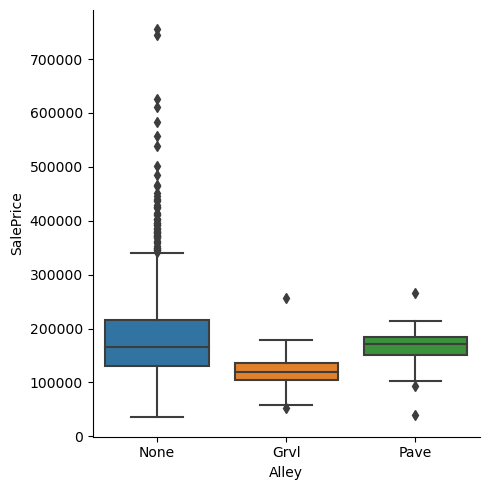

In [80]:
sn.catplot(data=df, x="Alley", y= "SalePrice", kind="box")

In [81]:
df["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [82]:
df["MasVnrType"].fillna("no", inplace= True)

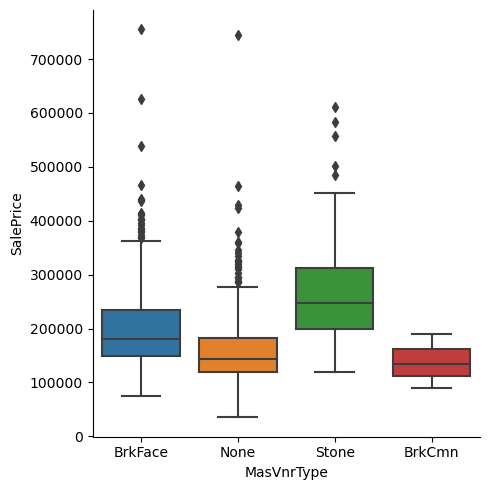

In [83]:
sn.catplot(data=df, x="MasVnrType", y= "SalePrice", kind="box")

In [84]:
df["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [85]:
import warnings
warnings.filterwarnings("ignore")
# lets see what is in the alley from unique funtion
df["Alley"].unique()

array(['None', 'Grvl', 'Pave'], dtype=object)

In [86]:
df["Alley"].fillna("no", inplace =True)

In [87]:
# now we can see there is no null value after imputation
df["Alley"].isnull().sum()

0

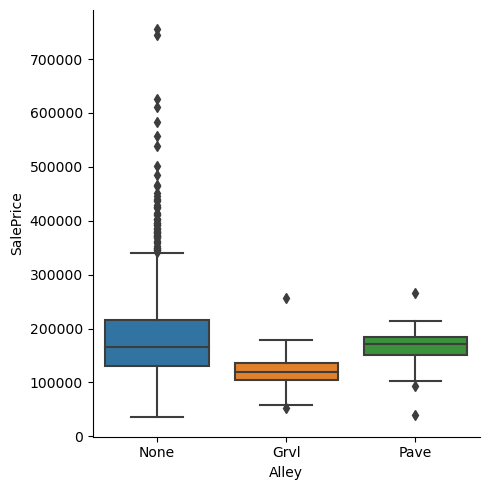

In [88]:
# 'df' is your DataFrame that contains the data
# Create a boxplot with SalePrice on the y-axis and Alley on the x-axis
sn.catplot(data=df,x="Alley",y="SalePrice", kind="box" )

In [89]:
df["MasVnrType"].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [90]:
df["MasVnrType"].fillna("no", inplace =True)

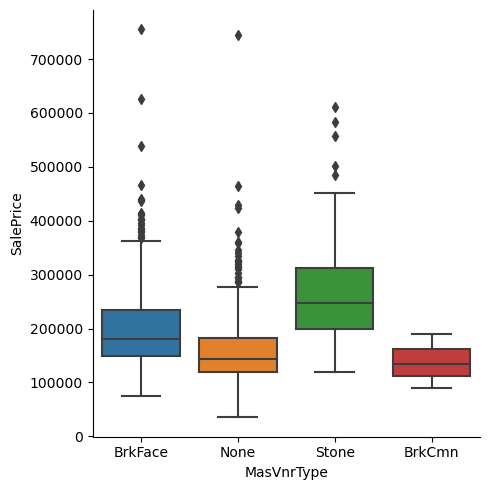

In [91]:
sn.catplot(data=df,x="MasVnrType",y="SalePrice", kind="box" )

In [92]:
#his code will give you the correlation coefficient between the GarageYrBlt and YearBuilt columns.
# A coefficient close to 1 or -1 indicates a strong relationship, while a coefficient close to 0 indicates a weak relationship.
# and we have found between 1 and -1
df["GarageYrBlt"]. corr(df["YearBuilt"])

0.8286542611347044

In [93]:
df["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [94]:
#  I am usig term (circuit breaker) for null or nan in the electric colmn

df["Electrical"].fillna("SBrkr", inplace= True)

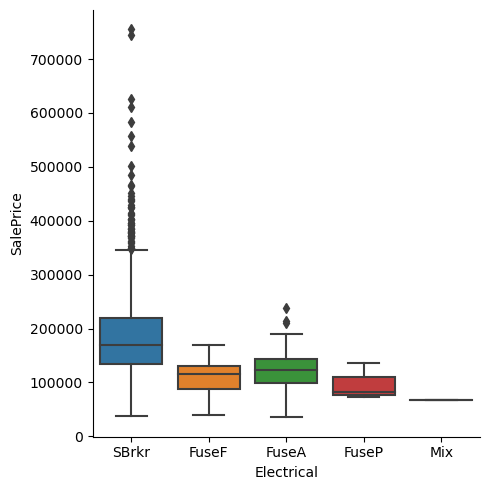

In [95]:
sn.catplot(data=df, x="Electrical", y= "SalePrice", kind="box")

## Remove unnecessory cloumm
### which is more than 70% null value or almost identical column   

In [96]:
df.columns

Index(['HouseID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

In [97]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_values = [21549.389438772603, 26522.95205479452, 17687.66955479452]
rmse_values = [34369.464158808434, 39317.56299278709, 28534.840264550443]
model_comparison = pd.DataFrame({'Model': models,'MAE': mae_values,'RMSE': rmse_values})
print(model_comparison)
best_model = model_comparison.loc[model_comparison['MAE'].idxmin()] #idxmin() finds the index of the minimum MAE value.
print("nBest Model based on MAE and RMSE:")
print(best_model)

               Model           MAE          RMSE
0  Linear Regression  21549.389439  34369.464159
1      Decision Tree  26522.952055  39317.562993
2      Random Forest  17687.669555  28534.840265
nBest Model based on MAE and RMSE:
Model    Random Forest
MAE       17687.669555
RMSE      28534.840265
Name: 2, dtype: object


# feature engineering

In [98]:
df["Houseage"]=df['YrSold'] - df['YearBuilt']

In [99]:
df["HouseRemodleAge"]=df['YrSold']- df['YearRemodAdd']

In [100]:
df["TotalSf"]=df[ '1stFlrSF']+ df['2ndFlrSF'] +df['BsmtFinSF1']+df['BsmtFinSF2']

In [101]:
df['TotalArea']=df[ 'GrLivArea']+df['TotalBsmtSF']

In [102]:
# Total number of bathrooms = number of full bathrooms + 0.5 * number of half bathrooms
    # + number of bathrooms in basement + 0.5 * number of half bathrooms in the basement.
df["TotalBaths"]=df['BsmtFullBath']+df['FullBath']+ 0.5*(df['BsmtHalfBath']+df['HalfBath'])

In [103]:
df["TotalPorchSF"]=df['OpenPorchSF']+df['EnclosedPorch']+df['3SsnPorch']+df['ScreenPorch']+df['WoodDeckSF']

In [104]:
df= df.drop(columns=['YrSold','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2',
                   'GrLivArea','TotalBsmtSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath',
                    'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','WoodDeckSF'])

In [105]:
## We have added certain features which are quite intuitive and are taken 
#into consideration in real life too while buying the house. Like what's the total area in square feet of the house 
#or how many bathrooms are there in the house. We could also look for the availability of swimming pool, garage
#fireplace and basement in the house. That's why I have added such features in the dataset

# correlation in numeric data through heat map

<Axes: >

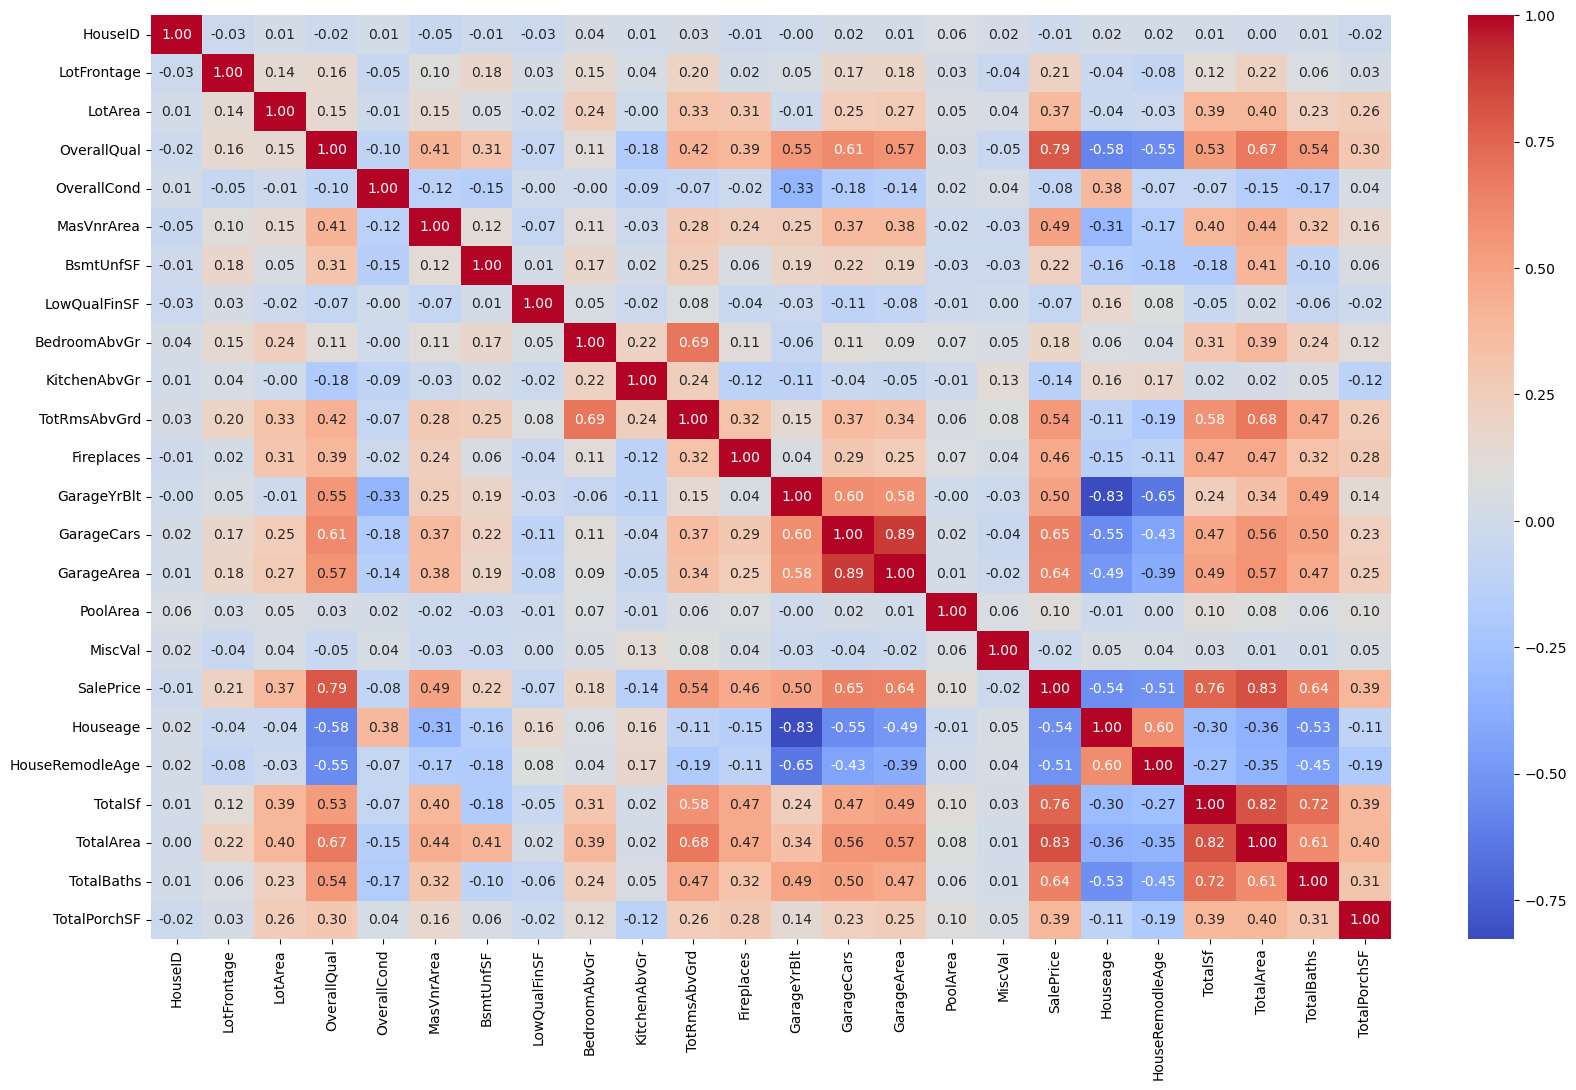

In [106]:
correlation_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sn.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=(".2f"))

In [107]:
# as we can see garageArea and garageCar are highely correlated so 
# we may drop one of them.

In [108]:
df= df.drop(columns=['GarageArea'])

# Visualisation from Histogram

<Axes: xlabel='SalePrice', ylabel='Count'>

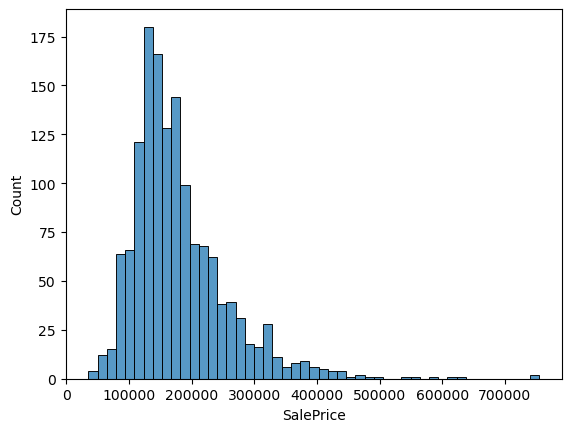

In [109]:
sn.histplot(df,
 x=df["SalePrice"])

## The np.log1p function comes from the NumPy library and computes the natural logarithm
### This transformation is often used in data preprocessing to reduce the skewness of the distribution of the data.
### In other words, if the "SalePrice" data is heavily skewed (i.e., not normally distributed), applying the natural logarithm can make it more 
### normally distributed, which is often beneficial for various statistical models

In [110]:
df["SalePrice"]=np.log1p(df["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Count'>

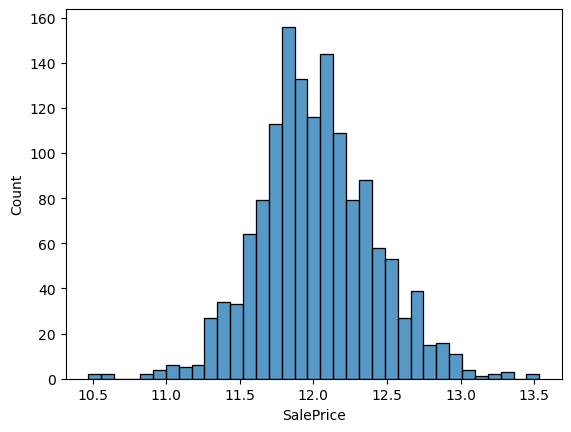

In [111]:
sn.histplot(df,x=df["SalePrice"])

In [123]:
df.dtypes[df.dtypes=='object']

MSSubClass       object
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature     

In [124]:
df.dtypes[df.dtypes !='object']

HouseID              int64
LotFrontage          int64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea           int64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageYrBlt        float64
GarageCars           int64
PoolArea             int64
MiscVal              int64
SalePrice          float64
Houseage             int64
HouseRemodleAge      int64
TotalSf              int64
TotalArea            int64
TotalBaths         float64
TotalPorchSF         int64
dtype: object

### Making pipeline throgh ordinalEncoder and oneHotencoder

In [125]:
ode_cols=['LotShape','LandContour','Utilities','LandSlope','BsmtQual','BsmtFinType1','CentralAir','Functional','FireplaceQu',
'GarageQual','GarageFinish','PavedDrive','ExterCond','KitchenQual','BsmtExposure','HeatingQC','BsmtExposure','ExterQual',
'BsmtCond']


In [126]:
ohe_cols=["Street",'LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd',
'MasVnrType','Foundation','Electrical','SaleType'
'MSZoning','SaleCondition','Heating','GarageType','RoofMatl']

In [127]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
num_cols = num_cols.drop('SalePrice')

In [128]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [129]:
ode_pipeline=Pipeline(steps=[('impute',SimpleImputer(strategy='Most_frequent')),
    ('ode', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1
    ))])

In [130]:
ohe_pipeline=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='Most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])                                                                                                    

In [131]:
col_trans = ColumnTransformer(transformers=[
    ("num_p", num_pipeline, num_cols),
    ("ode_p", ode_pipeline, ode_cols),
    ("ohe_p", ohe_pipeline, ohe_cols),
    ],
    remainder="passthrough",
    n_jobs=-1)

In [132]:
pipeline=Pipeline(steps=[
    ('preprocessing',col_trans )
])

## SalePrice Feature Analysis

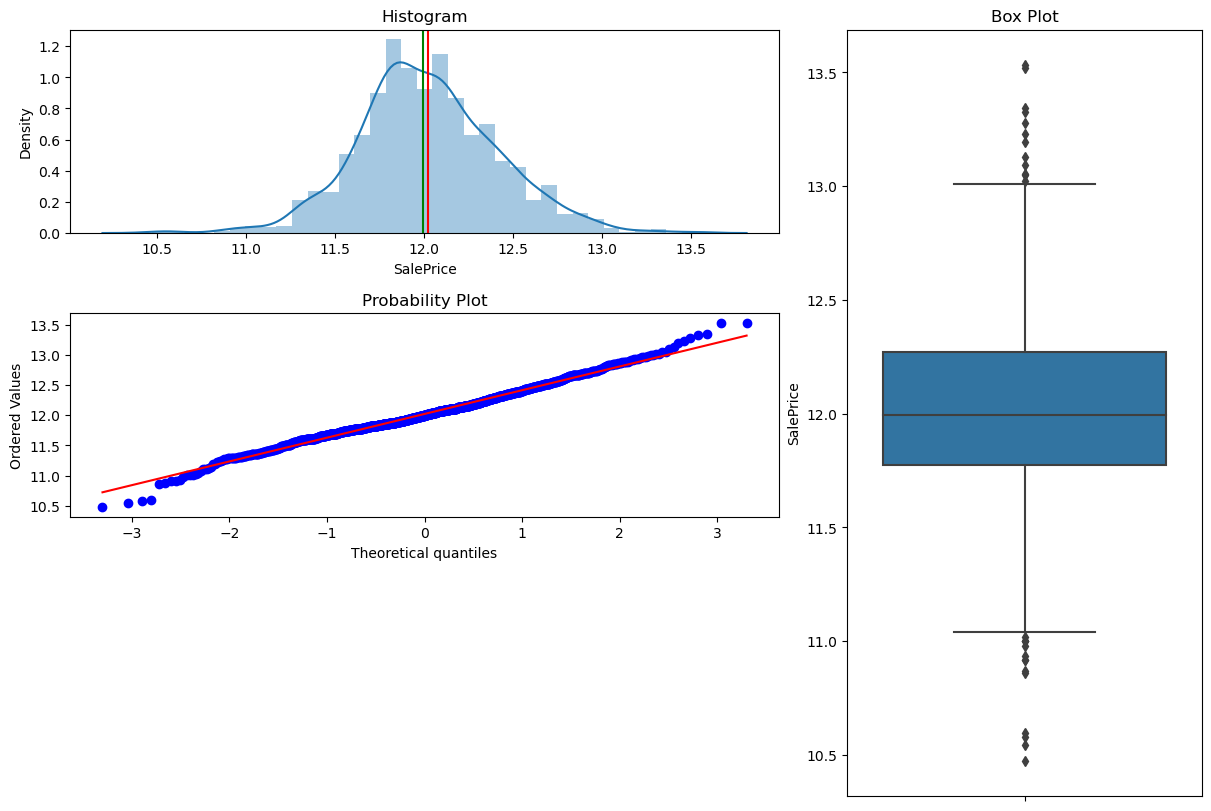

In [143]:
import matplotlib.gridspec as gridspec

def three_chart_plot(df, feature):
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    
    sn.distplot(df.loc[:, feature], norm_hist=True, ax=ax1)
    ax1.axvline(x=df[feature].mean(), c='red')
    ax1.axvline(x=df[feature].median(), c='green')
    
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(df.loc[:, feature], plot=ax2)

    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sn.boxplot(y=df.loc[:, feature], ax=ax3)
    
    plt.show()

# Example usage
three_chart_plot(df, 'SalePrice')


In [144]:
from scipy.stats import skew
print("Skewness of the SalesPrice is", df['SalePrice'].skew())

Skewness of the SalesPrice is 0.14161970565552856


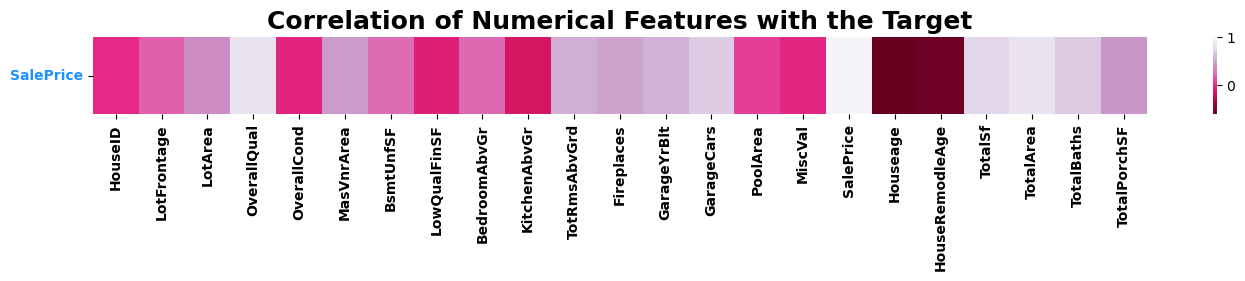

In [145]:
num = df.select_dtypes(exclude = 'object')
corr_num = num.corr()

f, ax = plt.subplots(figsize = (17, 1))

sn.heatmap(corr_num.sort_values(by = ['SalePrice'], ascending = False).head(1), cmap='PuRd_r')

plt.title('Correlation of Numerical Features with the Target', weight = 'bold', fontsize = 18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)

plt.show()


In [146]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate correlation matrix for numeric columns
correlation = numeric_df.corr()['SalePrice'].sort_values(ascending=False).to_frame().head(10)

# Apply the color map
cmap = sns.light_palette("cyan", as_cmap=True)
s = correlation.style.background_gradient(cmap=cmap)

# Display the styled DataFrame
s


NameError: name 'sns' is not defined

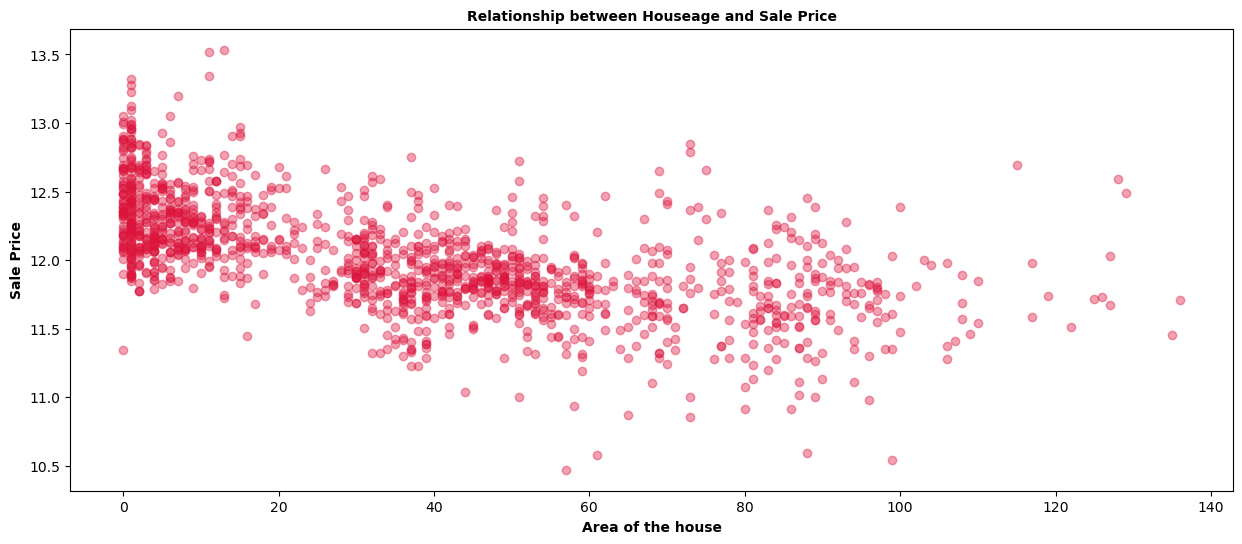

In [147]:
# Drop rows with missing values in 'Houseage' or 'SalePrice'
df_filtered = df.dropna(subset=['Houseage', 'SalePrice'])

# Create the scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(x='Houseage', y='SalePrice', data=df_filtered, color='crimson', alpha=0.4)
plt.title('Relationship between Houseage and Sale Price', weight='bold', fontsize=10)
plt.xlabel('Area of the house', weight='bold')
plt.ylabel('Sale Price', weight='bold')
plt.show()


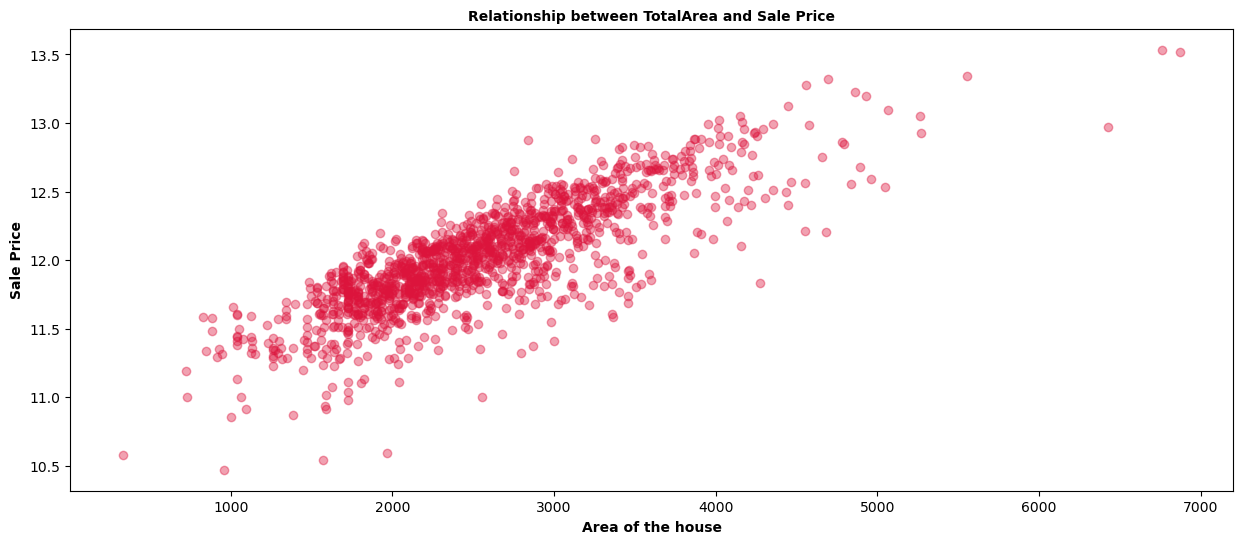

In [148]:
# Drop rows with missing values in 'Houseage' or 'SalePrice'
df_filtered = df.dropna(subset=['TotalArea', 'SalePrice'])

# Create the scatter plot
plt.figure(figsize=(15, 6))
plt.scatter(x='TotalArea', y='SalePrice', data=df_filtered, color='crimson', alpha=0.4)
plt.title('Relationship between TotalArea and Sale Price', weight='bold', fontsize=10)
plt.xlabel('Area of the house', weight='bold')
plt.ylabel('Sale Price', weight='bold')
plt.show()


### Now let's make sure that the target variable follows a normal distribution. In order to make a feature follow normal distribution, we will perform log transformation.

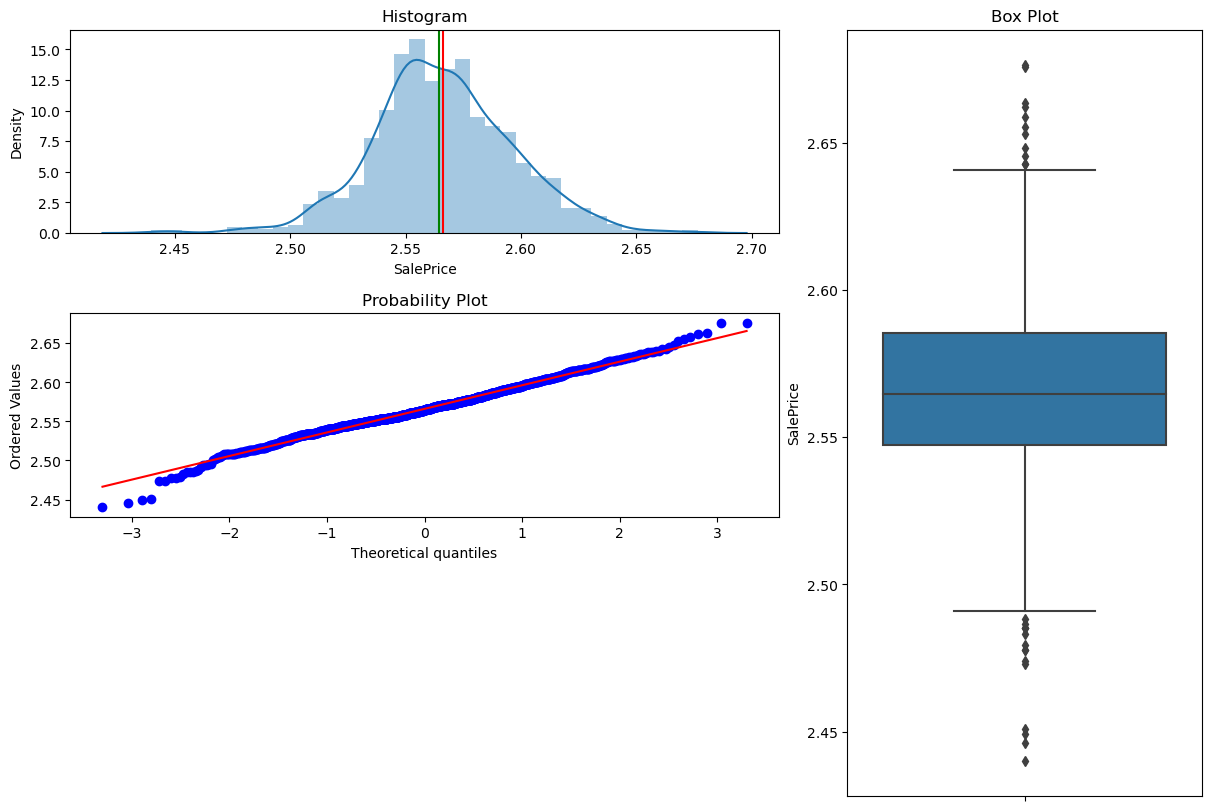

In [149]:
import matplotlib.pyplot as plt
from matplotlib import gridspec

df["SalePrice"] = np.log1p(df["SalePrice"])

# Plot the charts
three_chart_plot(df, 'SalePrice')


<Figure size 1500x1000 with 0 Axes>

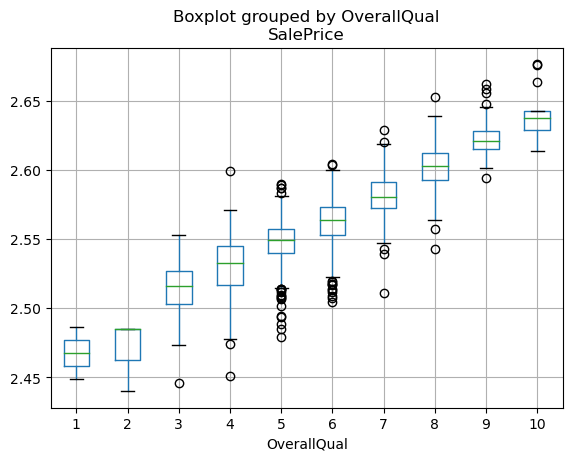

In [150]:
plt.figure(figsize = ((15, 10)))
df.boxplot(by = 'OverallQual', column = 'SalePrice')
plt.show()

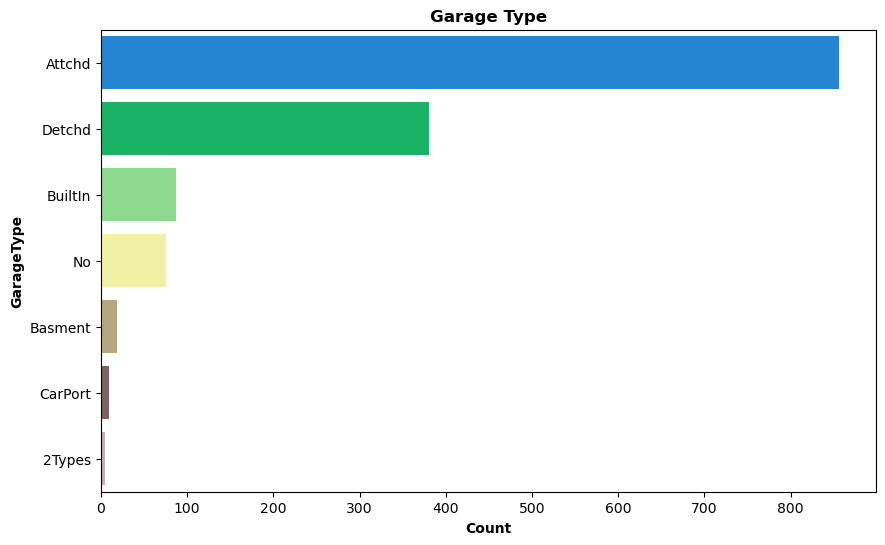

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

def horizontal_plot(df, column, palette, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], palette=palette, order=df[column].value_counts().index)
    plt.title(title, weight='bold')
    plt.xlabel('Count', weight='bold')
    plt.ylabel(column, weight='bold')
    plt.show()

# Example usage
horizontal_plot(df, 'GarageType', 'terrain', 'Garage Type')


In [152]:
def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    if train == True:
        pred = model.predict(x_train_std)
        
        print("Train Result:\n=======")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_train, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_train, pred)}")
        print("_______________________________________________")
        
    print()
    
    if train == False:
        pred = model.predict(x_test)
        
        print("Test Result:\n================================================")
        print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, pred))}")
        print("_______________________________________________")
        print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
        print("_______________________________________________")
        print(f"Mean Absolute Error: \n{mean_absolute_error(y_test, pred)}")
        print("_______________________________________________")

In [153]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_values = [21549.389438772603, 26522.95205479452, 17687.66955479452]
rmse_values = [34369.464158808434, 39317.56299278709, 28534.840264550443]
model_comparison = pd.DataFrame({'Model': models,'MAE': mae_values,'RMSE': rmse_values})
print(model_comparison)
best_model = model_comparison.loc[model_comparison['MAE'].idxmin()] #idxmin() finds the index of the minimum MAE value.
print("nBest Model based on MAE and RMSE:")
print(best_model)


               Model           MAE          RMSE
0  Linear Regression  21549.389439  34369.464159
1      Decision Tree  26522.952055  39317.562993
2      Random Forest  17687.669555  28534.840265
nBest Model based on MAE and RMSE:
Model    Random Forest
MAE       17687.669555
RMSE      28534.840265
Name: 2, dtype: object
